# **Data Science Assessment for Andani**

In [1483]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import chi2
%matplotlib inline
sns.set()


In [1484]:
csv_files = glob.glob('oulad_data/*.csv')
dataframes = {os.path.basename(file): pd.read_csv(file) for file in csv_files}

### **Data Pre-Processing, Exploration and Feature engineering**

In [1485]:
dataframes.keys()

dict_keys(['assessments.csv', 'courses.csv', 'studentAssessment.csv', 'studentInfo.csv', 'studentRegistration.csv', 'studentVle.csv', 'vle.csv'])

In [1486]:
for name in list(dataframes.keys()):
    old_name = name
    new_name = name.removesuffix(".csv")
    dataframes.update( {new_name: dataframes.pop(old_name)})

In [1487]:
dataframes.keys()

dict_keys(['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle'])

In [1488]:
dataframes['assessments'].head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1,TMA,30,20
1,AAA,2013J,2,TMA,75,20
2,AAA,2013J,3,TMA,120,20
3,AAA,2013J,4,Exam,230,100
4,AAA,2014B,5,TMA,30,20
5,AAA,2014B,6,CMA,75,30
6,AAA,2014B,7,TMA,120,20
7,AAA,2014B,8,Exam,230,100
8,BBB,2013J,9,CMA,30,30
9,BBB,2013J,10,CMA,75,30


In [1489]:
dataframes['courses'].head()

,code_module,code_presentation,length
0,AAA,2013J,240
1,AAA,2014B,240
2,BBB,2013J,240
3,BBB,2014B,240
4,CCC,2013J,240


In [1490]:
dataframes['studentAssessment'].head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1,9,26,0,29
1,1,10,28,0,55
2,1,12,29,0,76
3,1,16,27,0,24
4,1,19,24,0,19


In [1491]:
#def     total_weighted_score(score)

In [1492]:
dataframes['studentInfo'].head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,BBB,2014B,1,M,Wales,A Level or Equivalent,20-30%,55<=,2,90,N,Fail
1,EEE,2014B,2,F,North Region,A Level or Equivalent,40-50%,0-35,1,150,N,Pass
2,DDD,2013J,2,M,South East Region,Post Graduate Qualification,20-30%,55<=,0,90,N,Fail
3,CCC,2014B,3,F,South East Region,HE Qualification,90-100%,0-35,1,120,N,Fail
4,BBB,2014B,4,M,South Region,A Level or Equivalent,70-80%,35-55,1,60,N,Distinction


In [1493]:
dataframes['studentInfo'].id_student.nunique()

1000

In [1494]:
dataframes['studentRegistration'].head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,BBB,2014B,1,-51,NaN
1,EEE,2014B,2,-40,NaN
2,DDD,2013J,2,-56,NaN
3,CCC,2014B,3,-50,NaN
4,BBB,2014B,4,-39,NaN


In [1495]:
dataframes['studentVle'].head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,BBB,2014B,1,68,57,1
1,BBB,2014B,1,63,73,3
2,BBB,2014B,1,67,176,3
3,BBB,2014B,1,76,53,9
4,BBB,2014B,1,79,193,4


In [1496]:
dataframes['studentVle'].id_student.nunique()

1000

In [1497]:
dataframes['vle'].head(10)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,1,AAA,2013J,quiz,4,12
1,2,AAA,2013J,subpage,25,32
2,3,AAA,2013J,page,4,7
3,4,AAA,2013J,glossary,7,11
4,5,AAA,2013J,oucontent,20,21
5,6,AAA,2013J,glossary,27,34
6,7,AAA,2013J,resource,26,30
7,8,AAA,2013J,forum,3,6
8,9,AAA,2013J,quiz,1,5
9,10,AAA,2013J,subpage,1,9


In [1498]:
dataframes['vle']['number_of_weeks_on_vle'] = dataframes['vle'].week_to - dataframes['vle'].week_from
dataframes['vle']['activity_count'] = 1
dataframes['vle'].head(10)

,id_site,code_module,code_presentation,activity_type,week_from,week_to,number_of_weeks_on_vle,activity_count
0,1,AAA,2013J,quiz,4,12,8,1
1,2,AAA,2013J,subpage,25,32,7,1
2,3,AAA,2013J,page,4,7,3,1
3,4,AAA,2013J,glossary,7,11,4,1
4,5,AAA,2013J,oucontent,20,21,1,1
5,6,AAA,2013J,glossary,27,34,7,1
6,7,AAA,2013J,resource,26,30,4,1
7,8,AAA,2013J,forum,3,6,3,1
8,9,AAA,2013J,quiz,1,5,4,1
9,10,AAA,2013J,subpage,1,9,8,1


In [1499]:
df_studentVle = dataframes['studentVle'].groupby(['id_site','code_module','code_presentation','id_student'],sort=False)['sum_click'].sum().reset_index()

In [1500]:
df_studentVle

,id_site,code_module,code_presentation,id_student,sum_click
0,68,BBB,2014B,1,13
1,63,BBB,2014B,1,17
2,67,BBB,2014B,1,36
3,76,BBB,2014B,1,34
4,79,BBB,2014B,1,11
...,...,...,...,...,...
27092,26,AAA,2014B,1000,21
27093,38,AAA,2014B,1000,19
27094,28,AAA,2014B,1000,32
27095,24,AAA,2014B,1000,16


In [1501]:
print(df_studentVle.id_student.nunique())
dataframes['studentVle'].id_site.nunique()

1000


200

In [1502]:
df_studentVle[df_studentVle.id_student==100]

,id_site,code_module,code_presentation,id_student,sum_click
2557,79,BBB,2014B,100,36
2558,61,BBB,2014B,100,60
2559,71,BBB,2014B,100,28
2560,62,BBB,2014B,100,40
2561,76,BBB,2014B,100,42
2562,70,BBB,2014B,100,34
2563,72,BBB,2014B,100,38
2564,65,BBB,2014B,100,22
2565,77,BBB,2014B,100,45
2566,63,BBB,2014B,100,19


In [1503]:
vle_df = df_studentVle.merge(dataframes['vle'], on = ['id_site','code_module','code_presentation'],how = 'left')

In [1504]:
vle_df

,id_site,code_module,code_presentation,id_student,sum_click,activity_type,week_from,week_to,number_of_weeks_on_vle,activity_count
0,68,BBB,2014B,1,13,url,23,24,1,1
1,63,BBB,2014B,1,17,url,26,31,5,1
2,67,BBB,2014B,1,36,forum,8,14,6,1
3,76,BBB,2014B,1,34,oucontent,4,11,7,1
4,79,BBB,2014B,1,11,page,26,28,2,1
...,...,...,...,...,...,...,...,...,...,...
27092,26,AAA,2014B,1000,21,glossary,27,32,5,1
27093,38,AAA,2014B,1000,19,page,26,35,9,1
27094,28,AAA,2014B,1000,32,url,22,31,9,1
27095,24,AAA,2014B,1000,16,url,26,27,1,1


In [1505]:
vle_df = vle_df.groupby(['code_module','code_presentation','id_student'],sort=False)[['sum_click','number_of_weeks_on_vle','activity_count']].sum().reset_index()
vle_df

,code_module,code_presentation,id_student,sum_click,number_of_weeks_on_vle,activity_count
0,BBB,2014B,1,375,96,20
1,EEE,2014B,2,201,74,15
2,DDD,2013J,2,52,59,9
3,CCC,2014B,3,245,91,19
4,BBB,2014B,4,780,94,19
...,...,...,...,...,...,...
1502,EEE,2013J,998,446,102,20
1503,BBB,2014B,998,461,96,20
1504,AAA,2014B,999,155,83,15
1505,EEE,2014B,999,244,80,17


In [1506]:
for name in list(dataframes.keys()):
    print(f'number of rows in {name}: {len(dataframes[name])}')

number of rows in assessments: 40
number of rows in courses: 10
number of rows in studentAssessment: 5392
number of rows in studentInfo: 1507
number of rows in studentRegistration: 1507
number of rows in studentVle: 114130
number of rows in vle: 200


In [1507]:
df_1 = dataframes['assessments'].merge(dataframes['courses'],on = ['code_module','code_presentation'] ,how = 'left')
df_1.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,length
0,AAA,2013J,1,TMA,30,20,240
1,AAA,2013J,2,TMA,75,20,240
2,AAA,2013J,3,TMA,120,20,240
3,AAA,2013J,4,Exam,230,100,240
4,AAA,2014B,5,TMA,30,20,240


In [1508]:
df_1.shape

(40, 7)

In [1509]:
df_1 = df_1.merge(dataframes['studentAssessment'],on = ['id_assessment'] ,how = 'left')
df_1.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,length,id_student,date_submitted,is_banked,score
0,AAA,2013J,1,TMA,30,20,240,9,26,0,29
1,AAA,2013J,1,TMA,30,20,240,10,28,0,55
2,AAA,2013J,1,TMA,30,20,240,12,29,0,76
3,AAA,2013J,1,TMA,30,20,240,16,27,0,24
4,AAA,2013J,1,TMA,30,20,240,19,24,0,19


In [1510]:
#df_1[df_1.id_student == 1]
np.max(df_1[df_1.assessment_type == 'Exam']['score'])
df_1['weighted_score'] = (df_1['score']/100) * df_1['weight']
df_1.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight,length,id_student,date_submitted,is_banked,score,weighted_score
0,AAA,2013J,1,TMA,30,20,240,9,26,0,29,5.8
1,AAA,2013J,1,TMA,30,20,240,10,28,0,55,11.0
2,AAA,2013J,1,TMA,30,20,240,12,29,0,76,15.2
3,AAA,2013J,1,TMA,30,20,240,16,27,0,24,4.8
4,AAA,2013J,1,TMA,30,20,240,19,24,0,19,3.8
5,AAA,2013J,1,TMA,30,20,240,24,29,0,29,5.8
6,AAA,2013J,1,TMA,30,20,240,29,29,0,58,11.6
7,AAA,2013J,1,TMA,30,20,240,30,27,0,73,14.6
8,AAA,2013J,1,TMA,30,20,240,43,25,0,83,16.6
9,AAA,2013J,1,TMA,30,20,240,49,30,0,84,16.8


In [1511]:
cols = ['code_module', 'code_presentation', 'assessment_type','length','id_student','is_banked']

df = df_1.groupby(cols,as_index=False)[['weighted_score','weight']].sum()

In [1512]:
df[df['id_student']==1]

,code_module,code_presentation,assessment_type,length,id_student,is_banked,weighted_score,weight
1045,BBB,2014B,CMA,240,1,0,12.6,60
1208,BBB,2014B,Exam,240,1,0,18.0,100
1362,BBB,2014B,TMA,240,1,0,10.2,20


In [1513]:
cols = ['code_module', 'code_presentation','length','id_student','is_banked']
df = df_1.groupby(cols,as_index=False)[['weighted_score','weight']].sum()

In [1514]:
df

,code_module,code_presentation,length,id_student,is_banked,weighted_score,weight
0,AAA,2013J,240,9,0,63.4,160
1,AAA,2013J,240,10,0,92.8,160
2,AAA,2013J,240,12,0,121.2,160
3,AAA,2013J,240,16,0,77.6,160
4,AAA,2013J,240,19,0,33.4,160
...,...,...,...,...,...,...,...
1424,EEE,2014B,240,955,0,40.8,160
1425,EEE,2014B,240,980,0,145.4,160
1426,EEE,2014B,240,985,0,141.0,160
1427,EEE,2014B,240,986,0,24.8,160


In [1515]:
df.shape

(1429, 7)

In [1516]:
df_1 = df.merge(dataframes['studentInfo'],on = ['code_module','code_presentation','id_student'] ,how = 'left')
df_1.head()

,code_module,code_presentation,length,id_student,is_banked,weighted_score,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,240,9,0,63.4,160,F,South East Region,Post Graduate Qualification,80-90%,55<=,1,30,N,Fail
1,AAA,2013J,240,10,0,92.8,160,F,North Western Region,HE Qualification,40-50%,0-35,0,90,N,Pass
2,AAA,2013J,240,12,0,121.2,160,M,South Region,Post Graduate Qualification,30-40%,55<=,1,90,N,Pass
3,AAA,2013J,240,16,0,77.6,160,F,Wales,HE Qualification,0-10%,0-35,0,90,N,Fail
4,AAA,2013J,240,19,0,33.4,160,F,East Midlands Region,No Formal quals,90-100%,55<=,0,120,N,Fail


In [1517]:
df_1['final_score%'] = df_1['weighted_score']/  df_1['weight'] *100

In [1518]:
df_1[df_1['id_student']==980]

,code_module,code_presentation,length,id_student,is_banked,weighted_score,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_score%
1425,EEE,2014B,240,980,0,145.4,160,M,East Anglian Region,Lower Than A Level,80-90%,35-55,0,90,N,Distinction,90.875


In [1519]:
df_1.shape

(1429, 17)

In [1520]:
df_1 = df_1.merge(dataframes['studentRegistration'],on = ['code_module','code_presentation','id_student'] ,how = 'left')
df_1.head()

,code_module,code_presentation,length,id_student,is_banked,weighted_score,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,date_registration,date_unregistration
0,AAA,2013J,240,9,0,63.4,160,F,South East Region,Post Graduate Qualification,80-90%,55<=,1,30,N,Fail,39.625,-15,NaN
1,AAA,2013J,240,10,0,92.8,160,F,North Western Region,HE Qualification,40-50%,0-35,0,90,N,Pass,58.000,-25,NaN
2,AAA,2013J,240,12,0,121.2,160,M,South Region,Post Graduate Qualification,30-40%,55<=,1,90,N,Pass,75.750,-38,NaN
3,AAA,2013J,240,16,0,77.6,160,F,Wales,HE Qualification,0-10%,0-35,0,90,N,Fail,48.500,-41,NaN
4,AAA,2013J,240,19,0,33.4,160,F,East Midlands Region,No Formal quals,90-100%,55<=,0,120,N,Fail,20.875,-27,NaN


In [1521]:
df_1.shape

(1429, 19)

In [1522]:
df_studentVle.head()

,id_site,code_module,code_presentation,id_student,sum_click
0,68,BBB,2014B,1,13
1,63,BBB,2014B,1,17
2,67,BBB,2014B,1,36
3,76,BBB,2014B,1,34
4,79,BBB,2014B,1,11


In [1523]:
cols = ['code_module', 'code_presentation','length','id_student','is_banked']
df = df_1.groupby(cols,as_index=False)[['weighted_score','weight']].sum()

In [1524]:
df_1 = df_1.merge(vle_df,on = ['code_module','code_presentation','id_student'] ,how = 'left')
df_1.head(15)

,code_module,code_presentation,length,id_student,is_banked,weighted_score,weight,gender,region,highest_education,...,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,date_registration,date_unregistration,sum_click,number_of_weeks_on_vle,activity_count
0,AAA,2013J,240,9,0,63.4,160,F,South East Region,Post Graduate Qualification,...,1,30,N,Fail,39.625,-15,NaN,148,72,14
1,AAA,2013J,240,10,0,92.8,160,F,North Western Region,HE Qualification,...,0,90,N,Pass,58.000,-25,NaN,448,97,20
2,AAA,2013J,240,12,0,121.2,160,M,South Region,Post Graduate Qualification,...,1,90,N,Pass,75.750,-38,NaN,335,97,20
3,AAA,2013J,240,16,0,77.6,160,F,Wales,HE Qualification,...,0,90,N,Fail,48.500,-41,NaN,108,84,18
4,AAA,2013J,240,19,0,33.4,160,F,East Midlands Region,No Formal quals,...,0,120,N,Fail,20.875,-27,NaN,417,97,20
5,AAA,2013J,240,24,0,62.4,160,F,London Region,Post Graduate Qualification,...,2,120,N,Fail,39.000,-45,NaN,191,79,17
6,AAA,2013J,240,29,0,21.6,40,M,Wales,A Level or Equivalent,...,1,60,N,Withdrawn,54.000,-13,148.0,149,66,14
7,AAA,2013J,240,30,0,126.2,160,F,South East Region,Post Graduate Qualification,...,1,150,N,Pass,78.875,-54,NaN,521,97,20
8,AAA,2013J,240,43,0,139.6,160,F,North Western Region,Lower Than A Level,...,1,120,N,Distinction,87.250,-40,NaN,368,97,20
9,AAA,2013J,240,49,0,107.6,160,F,North Region,HE Qualification,...,2,30,N,Pass,67.250,-43,NaN,585,97,20


In [1525]:
df_1.shape

(1429, 22)

In [1526]:
df_1.shape

(1429, 22)

In [1527]:
df_1.columns

Index(['code_module', 'code_presentation', 'length', 'id_student', 'is_banked',
       'weighted_score', 'weight', 'gender', 'region', 'highest_education',
       'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits',
       'disability', 'final_result', 'final_score%', 'date_registration',
       'date_unregistration', 'sum_click', 'number_of_weeks_on_vle',
       'activity_count'],
      dtype='object')

In [1528]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code_module             1429 non-null   object 
 1   code_presentation       1429 non-null   object 
 2   length                  1429 non-null   int64  
 3   id_student              1429 non-null   int64  
 4   is_banked               1429 non-null   int64  
 5   weighted_score          1429 non-null   float64
 6   weight                  1429 non-null   int64  
 7   gender                  1429 non-null   object 
 8   region                  1429 non-null   object 
 9   highest_education       1429 non-null   object 
 10  imd_band                1429 non-null   object 
 11  age_band                1429 non-null   object 
 12  num_of_prev_attempts    1429 non-null   int64  
 13  studied_credits         1429 non-null   int64  
 14  disability              1429 non-null   

In [1529]:
ditinction = df_1[(df_1['final_score%'] > 80) & (df_1['final_result'] == 'Pass') ]
ditinction

,code_module,code_presentation,length,id_student,is_banked,weighted_score,weight,gender,region,highest_education,...,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,date_registration,date_unregistration,sum_click,number_of_weeks_on_vle,activity_count
64,AAA,2013J,240,442,0,128.6,160,F,London Region,A Level or Equivalent,...,1,120,N,Pass,80.375000,-44,NaN,726,97,20
83,AAA,2013J,240,557,0,130.2,160,M,North Region,HE Qualification,...,0,150,N,Pass,81.375000,-25,NaN,483,97,20
110,AAA,2013J,240,802,0,130.8,160,M,East Midlands Region,No Formal quals,...,0,60,Y,Pass,81.750000,-25,NaN,634,97,20
198,AAA,2014B,240,544,0,136.2,170,M,East Midlands Region,A Level or Equivalent,...,0,30,N,Pass,80.117647,-15,NaN,482,100,20
313,BBB,2013J,240,312,0,144.2,180,F,Wales,Lower Than A Level,...,1,150,Y,Pass,80.111111,-57,NaN,577,103,20
524,BBB,2014B,240,680,0,145.6,180,M,London Region,Post Graduate Qualification,...,1,60,N,Pass,80.888889,-14,NaN,603,96,20
637,CCC,2013J,240,386,0,138.0,170,F,East Midlands Region,Lower Than A Level,...,2,60,Y,Pass,81.176471,-13,NaN,428,74,20
1068,DDD,2014B,240,381,0,139.7,170,M,West Midlands Region,Lower Than A Level,...,0,30,N,Pass,82.176471,-56,NaN,279,89,19
1089,DDD,2014B,240,561,0,136.6,170,F,South West Region,No Formal quals,...,2,90,N,Pass,80.352941,-13,NaN,546,93,20
1094,DDD,2014B,240,596,0,136.2,170,F,South Region,Lower Than A Level,...,0,30,N,Pass,80.117647,-30,NaN,603,93,20


In [1530]:
df_1.loc[(df_1['final_score%'] >= 80) & (df_1['final_result'] == 'Pass'), 'final_result'] = 'Distinction'


In [1531]:
df_1[(df_1['final_score%'] > 80) & (df_1['final_result'] == 'Pass') ]

,code_module,code_presentation,length,id_student,is_banked,weighted_score,weight,gender,region,highest_education,...,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,date_registration,date_unregistration,sum_click,number_of_weeks_on_vle,activity_count


In [1532]:
df_1.drop(['length', 'id_student','weight','is_banked'],axis=1, inplace=True)

## **Exploratory Data Analysis**

### **Descriptive Statistics**

In [1533]:
df_1.describe()

,weighted_score,num_of_prev_attempts,studied_credits,final_score%,date_registration,date_unregistration,sum_click,number_of_weeks_on_vle,activity_count
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,128.000000,1429.000000,1429.000000,1429.000000
mean,94.559132,0.997901,89.937019,57.306210,-34.178446,122.968750,392.447866,88.595521,18.189643
std,47.220268,0.805702,42.715054,24.473057,14.600840,43.795865,221.784814,16.888542,2.994814
min,0.000000,0.000000,30.000000,0.000000,-59.000000,31.000000,20.000000,12.000000,4.000000
25%,50.600000,0.000000,60.000000,34.555556,-47.000000,88.750000,216.000000,79.000000,18.000000
50%,113.200000,1.000000,90.000000,66.000000,-34.000000,126.500000,363.000000,94.000000,20.000000
75%,129.200000,2.000000,120.000000,74.888889,-21.000000,157.000000,527.000000,98.000000,20.000000
max,178.300000,2.000000,150.000000,99.055556,-10.000000,198.000000,1091.000000,115.000000,20.000000


In [1534]:
#df_1.drop(['length', 'score'], axis=1, inplace=True)

In [1535]:
ditinction = df_1[(df_1['final_score%'] > 80) & (df_1['final_result'] == 'Pass') ]
ditinction

,code_module,code_presentation,weighted_score,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,date_registration,date_unregistration,sum_click,number_of_weeks_on_vle,activity_count


In [1536]:
df_1.dtypes

code_module                object
code_presentation          object
weighted_score            float64
gender                     object
region                     object
highest_education          object
imd_band                   object
age_band                   object
num_of_prev_attempts        int64
studied_credits             int64
disability                 object
final_result               object
final_score%              float64
date_registration           int64
date_unregistration       float64
sum_click                   int64
number_of_weeks_on_vle      int64
activity_count              int64
dtype: object

In [1537]:
df_categorical = df_1.select_dtypes(include=object)
len(df_categorical.columns)

9

In [1538]:
df_numerical = df_1.select_dtypes(exclude=object)
len(df_numerical.columns)

9

In [1539]:
for col in df_categorical.columns:
    unique = df_categorical[col].unique()
    unique.sort()
    print(f'- {col}: has {len(unique)} unique values \n  {unique}')

- code_module: has 5 unique values 
  ['AAA' 'BBB' 'CCC' 'DDD' 'EEE']
- code_presentation: has 2 unique values 
  ['2013J' '2014B']
- gender: has 2 unique values 
  ['F' 'M']
- region: has 11 unique values 
  ['East Anglian Region' 'East Midlands Region' 'London Region'
 'North Region' 'North Western Region' 'Scotland' 'South East Region'
 'South Region' 'South West Region' 'Wales' 'West Midlands Region']
- highest_education: has 5 unique values 
  ['A Level or Equivalent' 'HE Qualification' 'Lower Than A Level'
 'No Formal quals' 'Post Graduate Qualification']
- imd_band: has 10 unique values 
  ['0-10%' '10-20%' '20-30%' '30-40%' '40-50%' '50-60%' '60-70%' '70-80%'
 '80-90%' '90-100%']
- age_band: has 3 unique values 
  ['0-35' '35-55' '55<=']
- disability: has 2 unique values 
  ['N' 'Y']
- final_result: has 4 unique values 
  ['Distinction' 'Fail' 'Pass' 'Withdrawn']


In [1540]:
def categorize_region(region):
    if region in ['North Region', 'North Western Region', 'Scotland']:
        return 'North'
    elif region in ['East Midlands Region', 'West Midlands Region']:
        return 'Midlands'
    elif region in ['South Region', 'South West Region']:
        return 'South'
    elif region in ['South East Region', 'London Region']:
        return 'South East & London'
    elif region in ['East Anglian Region', 'Wales']:
        return 'East & Wales'
    else:
        return 'Unknown'

df_1['Area'] = df_1['region'].apply(categorize_region)
df_1[['Area','region']]

,Area,region
0,South East & London,South East Region
1,North,North Western Region
2,South,South Region
3,East & Wales,Wales
4,Midlands,East Midlands Region
...,...,...
1424,South East & London,South East Region
1425,East & Wales,East Anglian Region
1426,East & Wales,East Anglian Region
1427,Midlands,East Midlands Region


In [1541]:
def categorize_band(percentage):
    if percentage in ['0-10%', '10-20%']:
        return 'Very Low'
    elif percentage in ['20-30%', '30-40%']:
        return 'Low'
    elif percentage in ['40-50%', '50-60%']:
        return 'Medium'
    elif percentage in ['60-70%', '70-80%']:
        return 'High'
    elif percentage in ['80-90%', '90-100%']:
        return 'Very High'
    else:
        return 'Unknown'

# Apply the function
df_1['percent range'] = df_1['imd_band'].apply(categorize_band)
df_1[['imd_band','percent range']]

,imd_band,percent range
0,80-90%,Very High
1,40-50%,Medium
2,30-40%,Low
3,0-10%,Very Low
4,90-100%,Very High
...,...,...
1424,60-70%,High
1425,80-90%,Very High
1426,30-40%,Low
1427,90-100%,Very High


In [1542]:
def categorize_qualification(qual):
    if qual == 'No Formal quals':
        return 'None'
    elif qual == 'Lower Than A Level':
        return 'Lower Than A'
    elif qual == 'A Level or Equivalent':
        return 'Mid or A-level'
    elif qual == 'HE Qualification':
        return 'Higher'
    elif qual == 'Post Graduate Qualification':
        return 'Postgrad'
    else:
        return 'Unknown'

# Apply the function
df_1['Qualification'] = df_1['highest_education'].apply(categorize_qualification)

In [1543]:
df_1.drop(['region','imd_band','highest_education'], axis=1, inplace=True)

### **Data Visualisation**

In [1544]:
df_categorical = df_1.select_dtypes(include=object)
df_numerical = df_1.select_dtypes(exclude=object)

In [1545]:
df_numerical.drop('date_unregistration', axis=1, inplace=True)

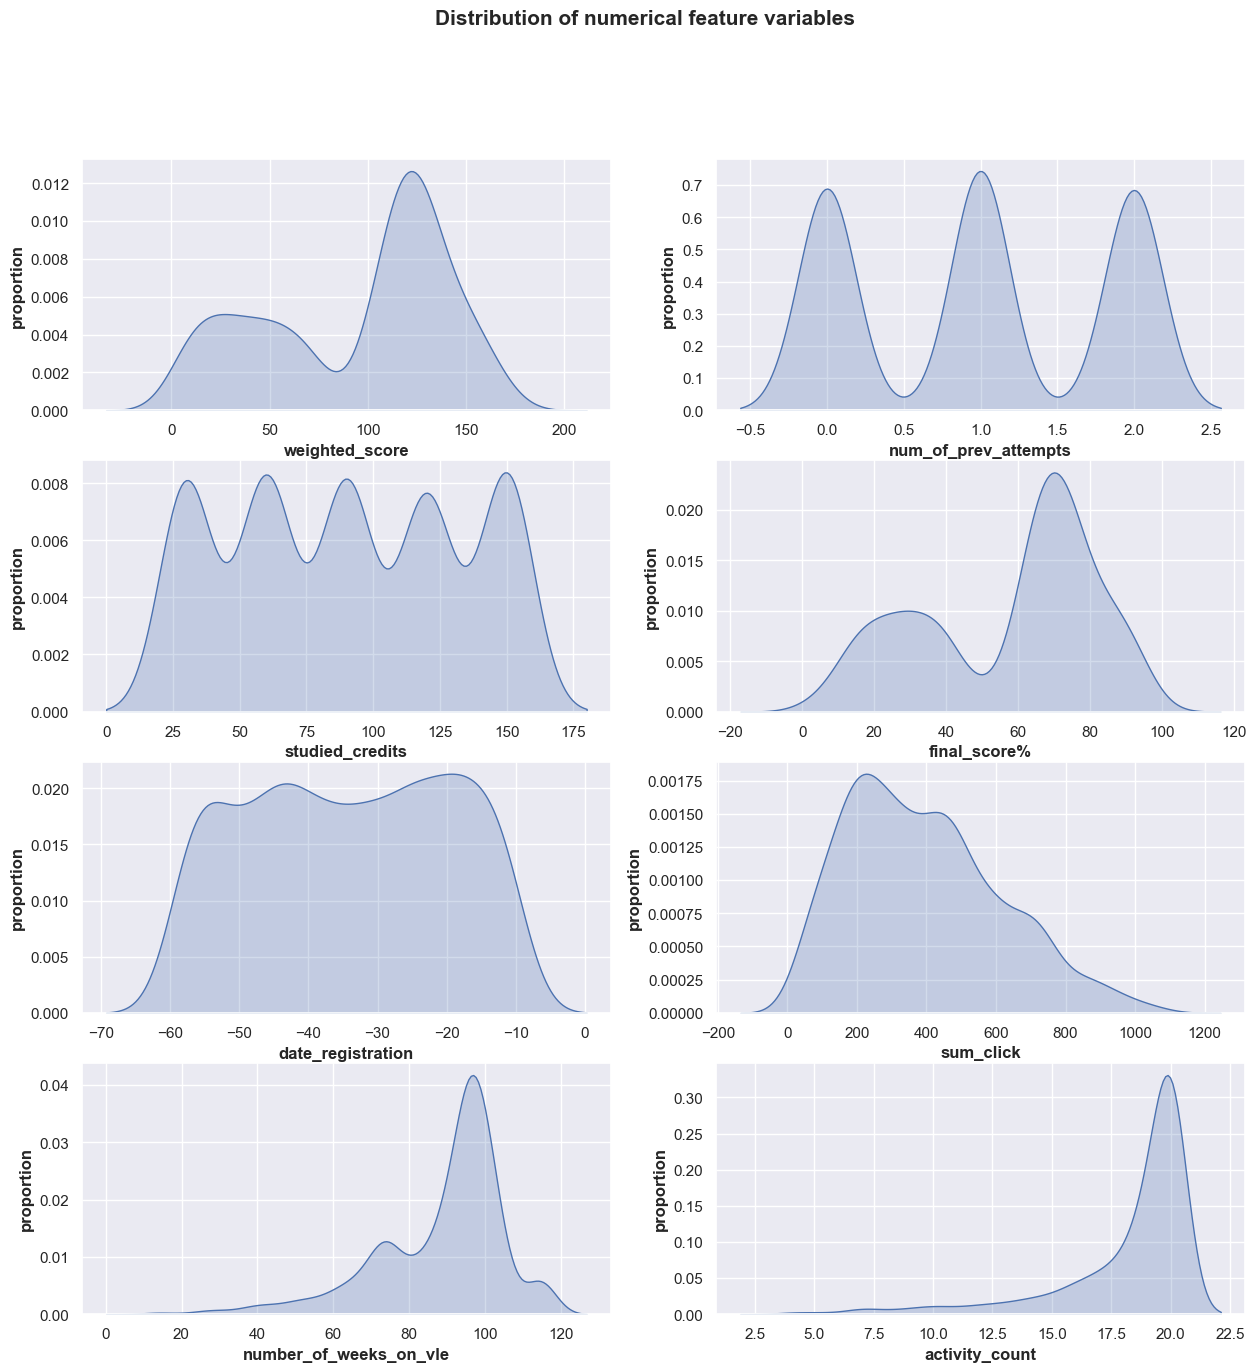

In [1546]:
features_array = np.array(df_numerical.columns, dtype='object').reshape(4,2)
fig, ax  =  plt.subplots(4,2,sharey=False,figsize=(15,15))
for i, col in np.ndenumerate(features_array):
    sns.kdeplot(x =col, data = df_numerical, fill=True, ax = ax[i[0],i[1]])
    ax[i[0],i[1]].set_xlabel(col, fontweight="bold")
    ax[i[0],i[1]].set_ylabel("proportion", fontweight="bold")
plt.suptitle("Distribution of numerical feature variables", fontweight="bold", size=(15))
plt.show()

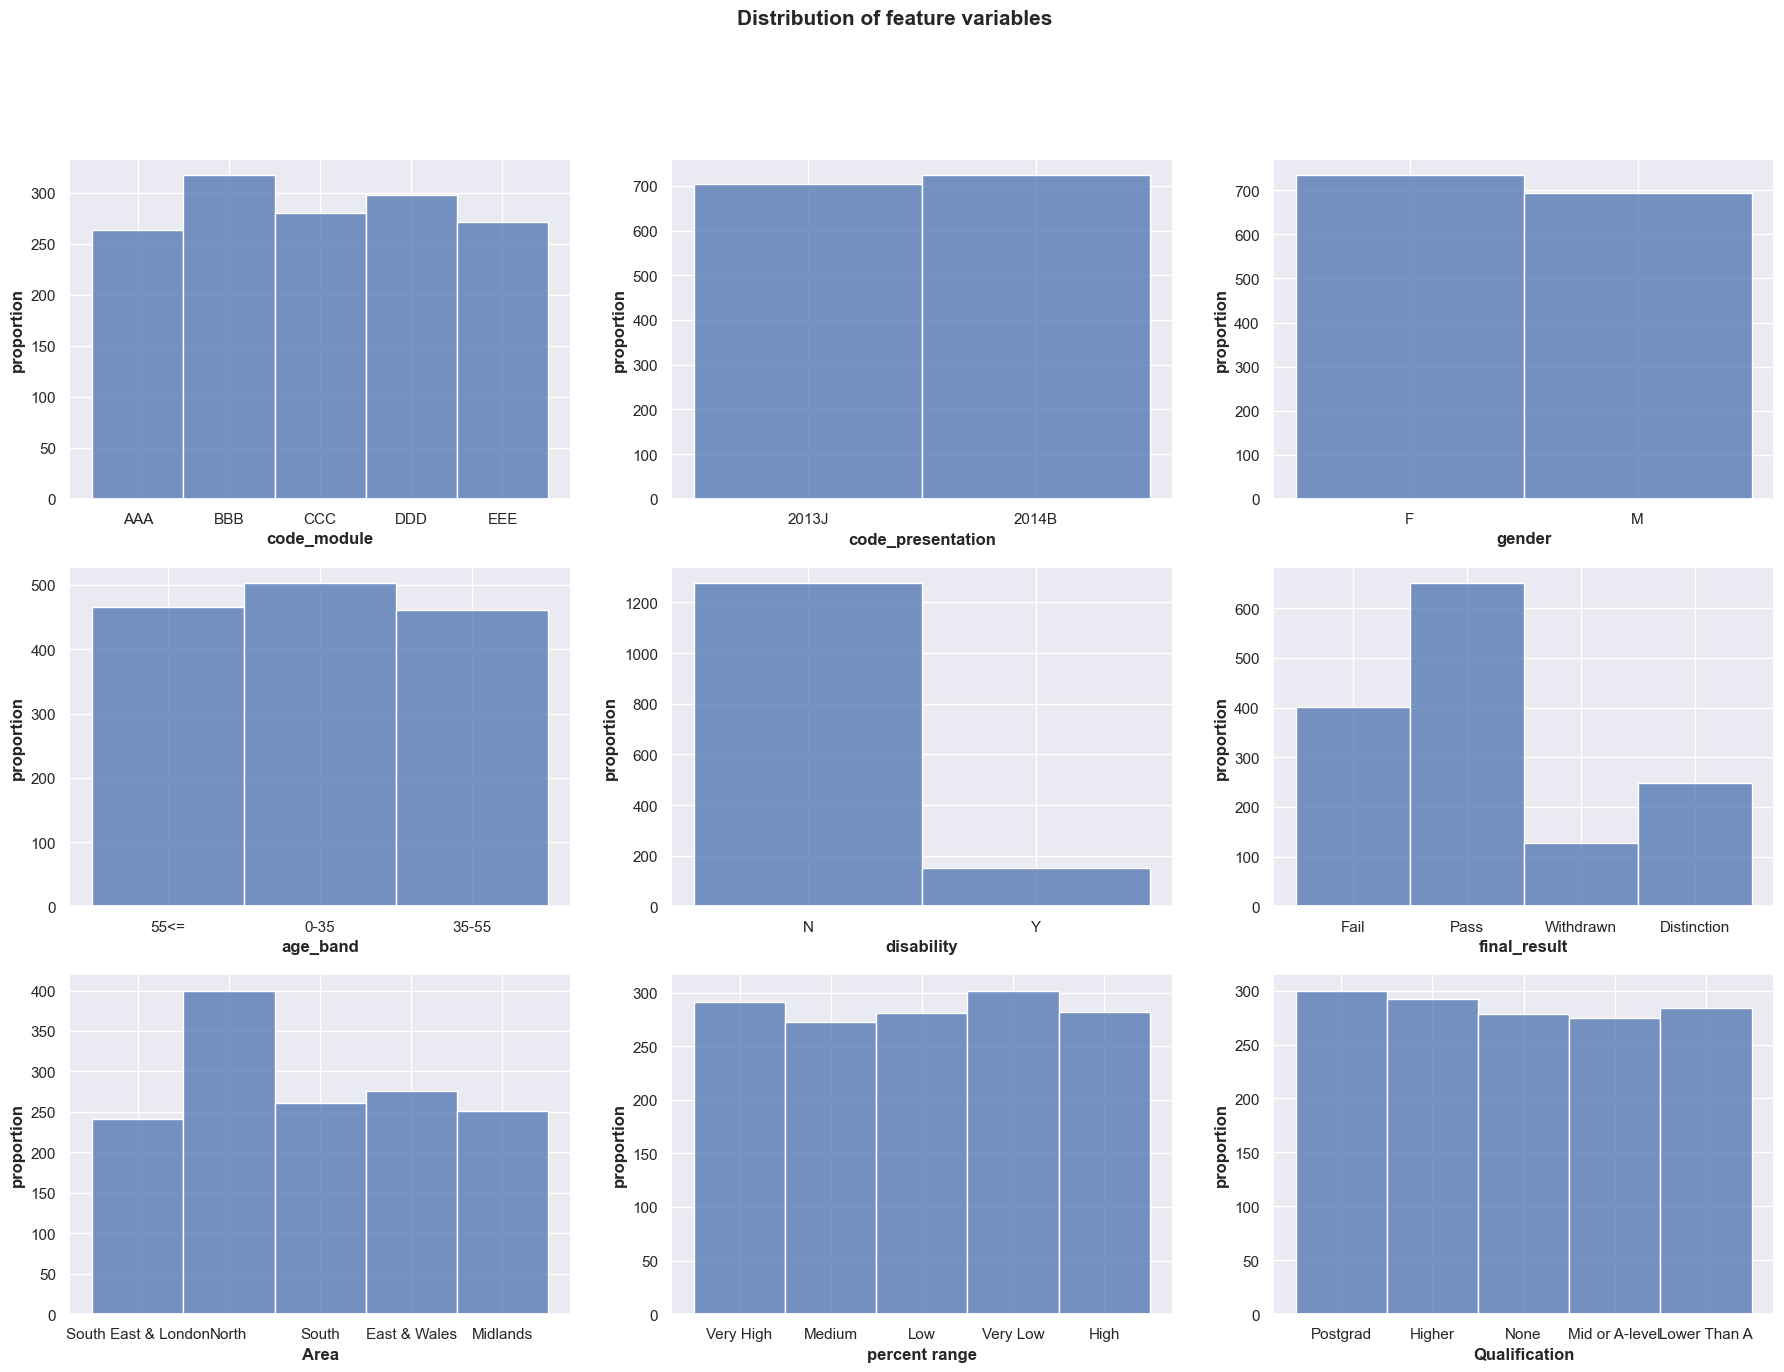

In [1547]:
features_array_cat = np.array(df_categorical.columns, dtype='object').reshape(3,3)
fig, ax  =  plt.subplots(3,3,sharey=False,figsize=(22,15))
for i, col in np.ndenumerate(features_array_cat):
    sns.histplot(x =col, data = df_categorical, fill=True, ax = ax[i[0],i[1]])
    ax[i[0],i[1]].set_xlabel(col, fontweight="bold")
    ax[i[0],i[1]].set_ylabel("proportion", fontweight="bold")
plt.suptitle("Distribution of feature variables", fontweight="bold", size=(15))
plt.show()
#v

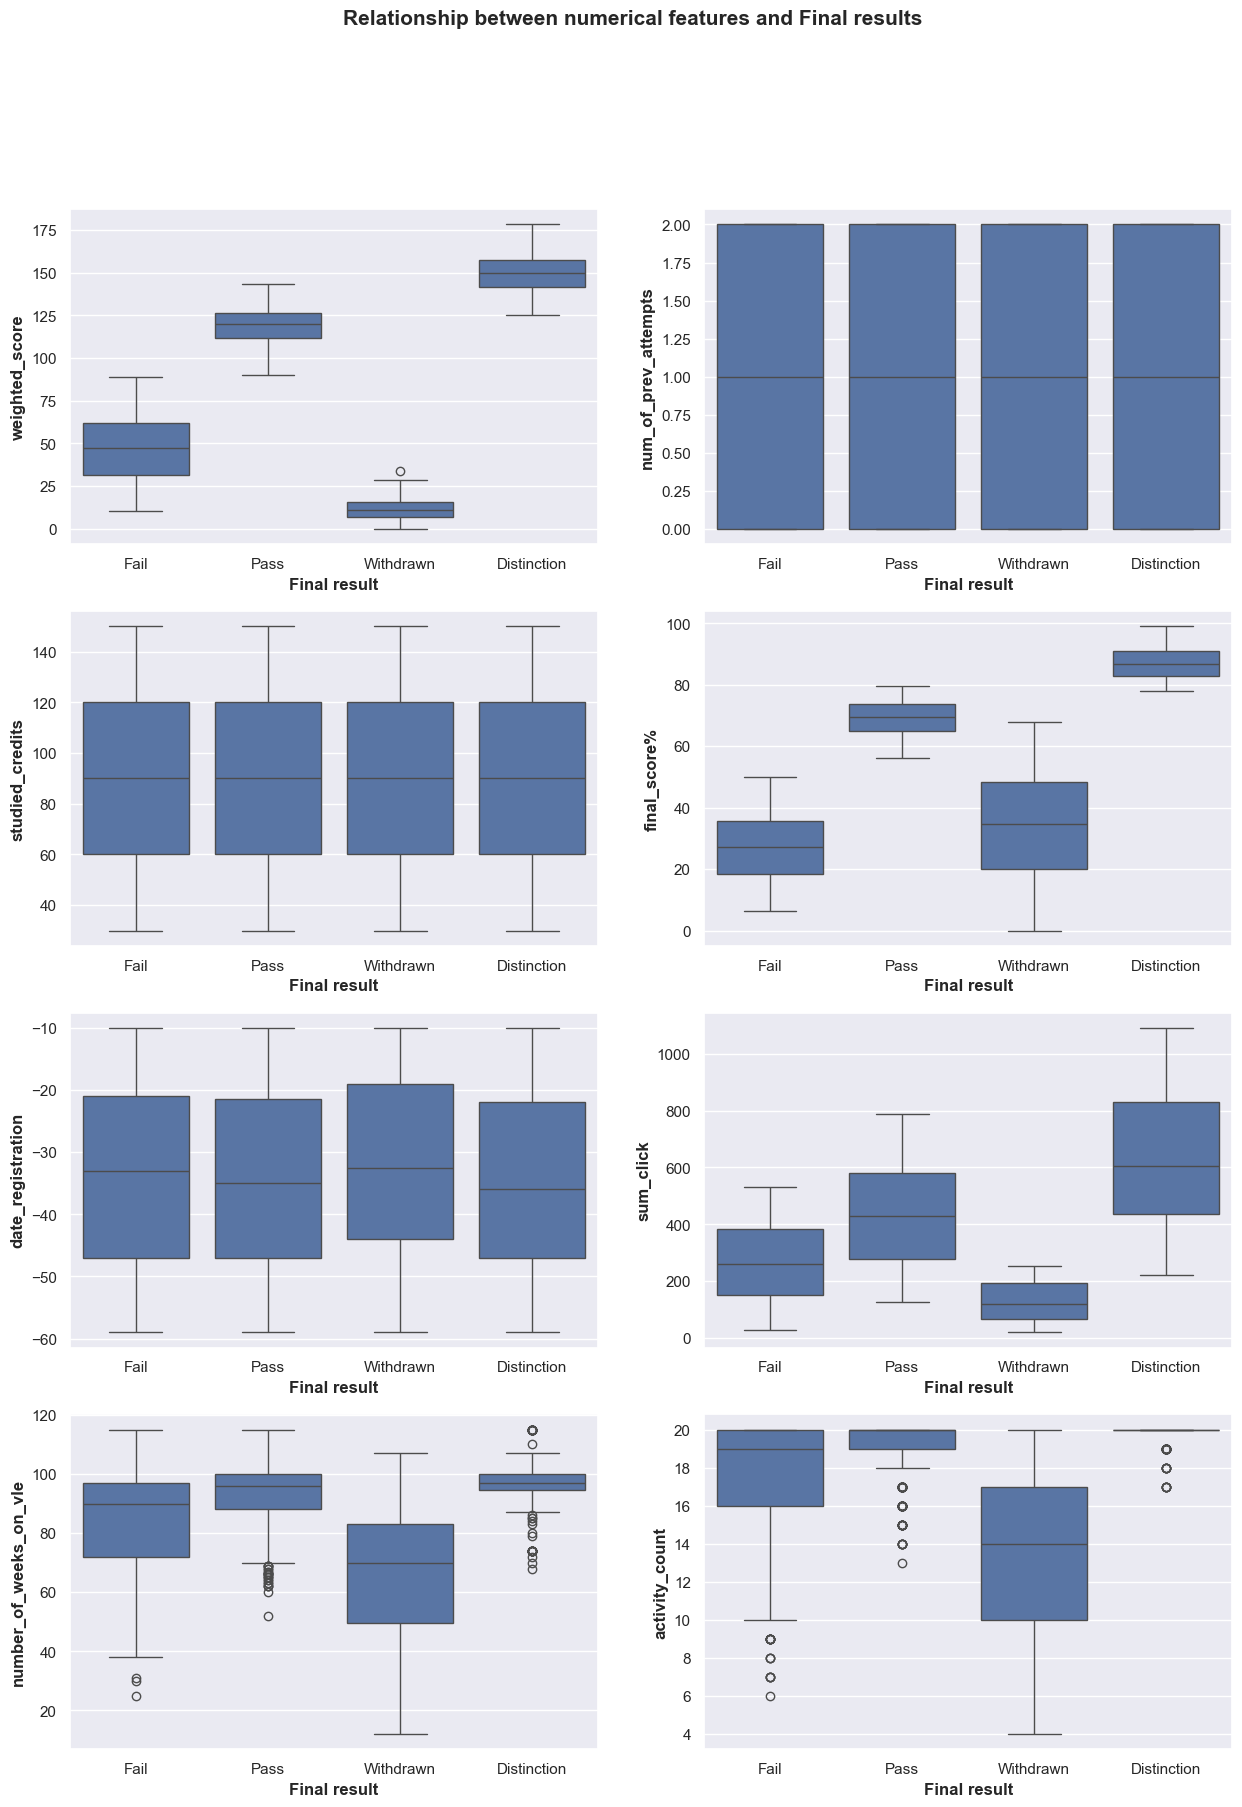

In [1548]:
fig, ax  =  plt.subplots(4,2,sharey=False,figsize=(15,20 ))
for i, col in np.ndenumerate(features_array):
    sns.boxplot(ax = ax[i[0],i[1]], x = 'final_result', y = col , data = df_1)
    ax[i[0],i[1]].set_xlabel('Final result', fontweight="bold")
    #ax[i[0],i[1]].set_xticklabels(['benign','malignant'],fontweight="bold")
    ax[i[0],i[1]].set_ylabel(col, fontweight="bold")
    
plt.suptitle("Relationship between numerical features and Final results", fontweight="bold", size=(15))
plt.show()

### **Categoriacal Features Engineering**

In [1549]:
#df_1 = df_1[df_1['final_result'] != 'Withdrawn']
df_1.drop(['date_unregistration','date_registration','code_module','code_presentation'],axis=1,inplace=True)
df_categorical.drop(['code_module','code_presentation'],axis=1,inplace=True)

In [1550]:
categories = [['Withdrawn', 'Fail', 'Pass', 'Distinction']]

# Initialize OrdinalEncoder with unknown value handling
oe = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Make sure to copy the DataFrame to avoid SettingWithCopyWarning
encoded_df = df_1.copy()

# Check if 'final_result' contains any unexpected or null values
print(df_1['final_result'].unique())

# Fit and transform the 'final_result' column using the encoder
encoded_df['final_result'] = oe.fit_transform(df_1[['final_result']])

# Convert to integer type after encoding
encoded_df['final_result'] = encoded_df['final_result'].fillna(-1).astype(int)

# Check the results
encoded_df.head()

['Fail' 'Pass' 'Withdrawn' 'Distinction']


,weighted_score,gender,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,sum_click,number_of_weeks_on_vle,activity_count,Area,percent range,Qualification
0,63.4,F,55<=,1,30,N,1,39.625,148,72,14,South East & London,Very High,Postgrad
1,92.8,F,0-35,0,90,N,2,58.000,448,97,20,North,Medium,Higher
2,121.2,M,55<=,1,90,N,2,75.750,335,97,20,South,Low,Postgrad
3,77.6,F,0-35,0,90,N,1,48.500,108,84,18,East & Wales,Very Low,Higher
4,33.4,F,55<=,0,120,N,1,20.875,417,97,20,Midlands,Very High,None


In [1551]:
encoded_df.head(10)

,weighted_score,gender,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,sum_click,number_of_weeks_on_vle,activity_count,Area,percent range,Qualification
0,63.4,F,55<=,1,30,N,1,39.625,148,72,14,South East & London,Very High,Postgrad
1,92.8,F,0-35,0,90,N,2,58.000,448,97,20,North,Medium,Higher
2,121.2,M,55<=,1,90,N,2,75.750,335,97,20,South,Low,Postgrad
3,77.6,F,0-35,0,90,N,1,48.500,108,84,18,East & Wales,Very Low,Higher
4,33.4,F,55<=,0,120,N,1,20.875,417,97,20,Midlands,Very High,None
5,62.4,F,35-55,2,120,N,1,39.000,191,79,17,South East & London,High,Postgrad
6,21.6,M,55<=,1,60,N,0,54.000,149,66,14,East & Wales,Very High,Mid or A-level
7,126.2,F,0-35,1,150,N,2,78.875,521,97,20,South East & London,Very Low,Postgrad
8,139.6,F,0-35,1,120,N,3,87.250,368,97,20,North,Medium,Lower Than A
9,107.6,F,35-55,2,30,N,2,67.250,585,97,20,North,High,Higher


In [1552]:
label_encoder = LabelEncoder()

cat_columns = list(df_categorical.columns)
cat_columns.remove('final_result')
for col in df_categorical.columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

encoded_df.head(15)

,weighted_score,gender,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_score%,sum_click,number_of_weeks_on_vle,activity_count,Area,percent range,Qualification
0,63.4,0,2,1,30,0,1,39.625,148,72,14,4,3,4
1,92.8,0,0,0,90,0,2,58.000,448,97,20,2,2,0
2,121.2,1,2,1,90,0,2,75.750,335,97,20,3,1,4
3,77.6,0,0,0,90,0,1,48.500,108,84,18,0,4,0
4,33.4,0,2,0,120,0,1,20.875,417,97,20,1,3,3
5,62.4,0,1,2,120,0,1,39.000,191,79,17,4,0,4
6,21.6,1,2,1,60,0,0,54.000,149,66,14,0,3,2
7,126.2,0,0,1,150,0,2,78.875,521,97,20,4,4,4
8,139.6,0,0,1,120,0,3,87.250,368,97,20,2,2,1
9,107.6,0,1,2,30,0,2,67.250,585,97,20,2,0,0


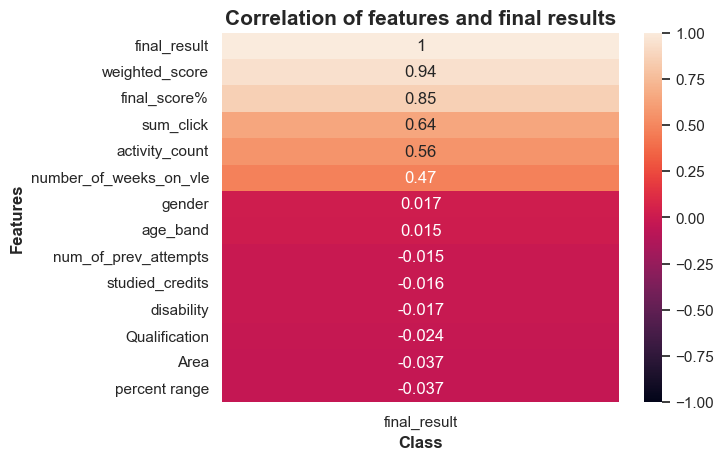

In [1553]:
sns.heatmap(
    encoded_df.corr()[['final_result']]\
    .sort_values(
        by = 'final_result',
        ascending=False
    ),
    vmin=-1,
    vmax=1,
    annot=True
)
plt.title('Correlation of features and final results', fontweight = 'bold',size=(15))
plt.xlabel('Class', fontweight = 'bold')
plt.ylabel('Features',fontweight= 'bold')
plt.show()


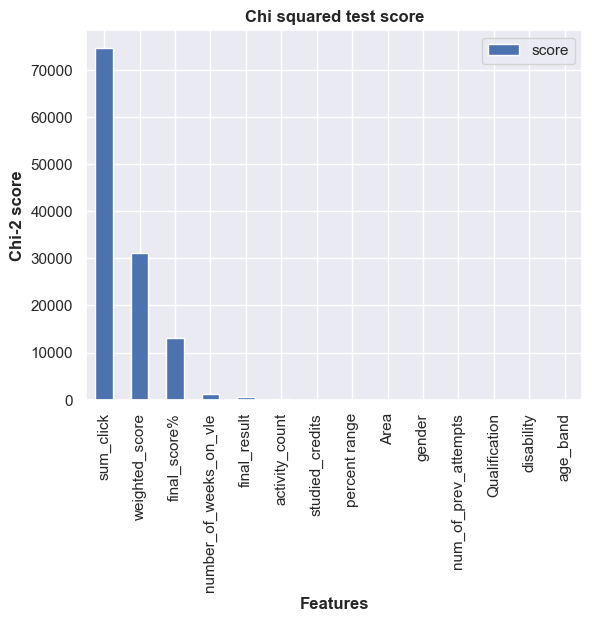

In [1554]:
scores = chi2(encoded_df,encoded_df['final_result'])
chi_vals = pd.DataFrame(scores[0],index = encoded_df.columns,columns = ['score'])
chi_vals.sort_values(ascending=False,inplace=True,by='score')
chi_vals.plot.bar()
plt.xlabel('Features',fontweight="bold")
plt.ylabel('Chi-2 score',fontweight="bold")
plt.title('Chi squared test score',fontweight="bold")
plt.show()

In [1555]:
df_vif = pd.DataFrame()
features = list(encoded_df.columns)
features.remove('final_result')
df_vif['FEATURES'] = features
df_vif['VIF'] = [variance_inflation_factor(encoded_df.values, i)
                          for i in range(len(features))]

In [1556]:
df_vif.sort_values("VIF", axis = 0, ascending = False,inplace = True)
df_vif 

,FEATURES,VIF
10,Area,119.409084
0,weighted_score,104.009907
9,activity_count,97.875170
7,sum_click,56.661457
6,final_score%,49.842972
8,number_of_weeks_on_vle,8.324765
4,studied_credits,5.076141
11,percent range,3.046438
12,Qualification,3.007268
3,num_of_prev_attempts,2.502159


In [1557]:
encoded_df.drop(['weighted_score'],axis=1, inplace=True)

In [1558]:
df_vif = pd.DataFrame()
features = list(encoded_df.columns)
features.remove('final_result')
df_vif['FEATURES'] = features
df_vif['VIF'] = [variance_inflation_factor(encoded_df.values, i)
                          for i in range(len(features))]

In [1559]:
df_vif.sort_values("VIF", axis = 0, ascending = False,inplace = True)
df_vif 

,FEATURES,VIF
9,Area,117.580985
8,activity_count,96.792462
6,sum_click,23.178088
5,final_score%,22.247328
7,number_of_weeks_on_vle,8.296062
3,studied_credits,5.064057
10,percent range,3.044672
11,Qualification,3.006975
2,num_of_prev_attempts,2.501143
1,age_band,2.372252


In [1560]:
encoded_df.drop(['activity_count','final_score%'],axis=1, inplace=True)

In [1561]:
df_vif = pd.DataFrame()
features = list(encoded_df.columns)
features.remove('final_result')
df_vif['FEATURES'] = features
df_vif['VIF'] = [variance_inflation_factor(encoded_df.values, i)
                          for i in range(len(features))]

In [1562]:
df_vif.sort_values("VIF", axis = 0, ascending = False,inplace = True)
df_vif 

,FEATURES,VIF
7,Area,19.982778
5,sum_click,8.825316
6,number_of_weeks_on_vle,8.033301
3,studied_credits,4.943447
8,percent range,2.990174
9,Qualification,2.960063
2,num_of_prev_attempts,2.480375
1,age_band,2.351072
0,gender,1.949778
4,disability,1.124400


In [1563]:
encoded_df.drop(['number_of_weeks_on_vle','sum_click'],axis=1, inplace=True)

In [1564]:
df_vif = pd.DataFrame()
features = list(encoded_df.columns)
features.remove('final_result')
df_vif['FEATURES'] = features
df_vif['VIF'] = [variance_inflation_factor(encoded_df.values, i)
                          for i in range(len(features))]

In [1565]:
df_vif.sort_values("VIF", axis = 0, ascending = False,inplace = True)
df_vif 

,FEATURES,VIF
3,studied_credits,4.318365
5,Area,3.858419
6,percent range,2.783258
7,Qualification,2.686139
2,num_of_prev_attempts,2.337965
1,age_band,2.255467
0,gender,1.889529
4,disability,1.123418
